<a href="https://colab.research.google.com/github/liminovna/HSE_ML_NOTEBOOKS/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 2

Этот набор данных содержит информацию о подержанных автомобилях.

- Car_Name - Название автомобиля
- Year - год в котором купил машину предыдущий владелец
- Selling_Price - цена продажи машины сейчас
- Present_Price - предыдущая цена покупки
- Kms_Driven - сколько километров проехала машина
- Fuel_Type - тип используемого топлива
- Seller_Type - тип продавца
- Transmission - тип коробки передач
- Owner - количество владельцев автомобиля до текущего хозяина

Целевой переменной считать - Selling_Price.

1. После загрузки необходимо проанализировать существующие признаки.
2. Определите какие признаки являются числовыми, а какие категориальными (кодом!) Выведите список одних и других.
3. Используйте стратегию валидации Holdout. Постройте линейную регрессию на числовых признаках. Оцените качество работы с помощью метрик MSE и MAE.
4. Проанализируйте важность признаков без библиотеки yellowbrick.
5. Сравните результат вашего анализа с результатов yellowbrick.
6. Добавьте категориальные признаки при помощи метода sklearn.preprocessing.OneHotEncoder. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) + [Пример использования](https://www.dmitrymakarov.ru/data-analysis/encoding-10/#10-klass-onehotencoder)
7. Переобучите модель. Также проанализируйте важность признаков, что изменилось? А как изменились метрики?
8. Добавьте регуляризацию (3 типа). Как меняется важность признаков? Как изменяются метрики?
9. Добавьте [Learning Curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) для одной из моделей. [Визуализируйте результат!](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [1]:
# Импорты

import pandas as pd

In [2]:
# Загрузка данных
sharing_url = "https://drive.google.com/file/d/1qeae-8oAfQnULTs838ROpupXLvMNwtiO/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)

In [3]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [4]:
# 2. Определите какие признаки являются числовыми, а какие категориальными (кодом!) Выведите список одних и других.

df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


In [5]:
# 3. Используйте стратегию валидации Holdout. Постройте линейную регрессию на числовых признаках. Оцените качество работы с помощью метрик MSE и MAE.

categ_cols = [c for c in df.columns if df[c].dtype=='object']

df_num = df.drop(columns=categ_cols) # создаем копию датасета без категориальных признаков
df_num

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# создаем два датасета train и test
X = df_num.drop(columns=['Selling_Price'])
y = df_num['Selling_Price']

# нормализируем
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # отдаем 10% датасета под test set

print(len(X_train), len(X_test))

240 61


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_test['prediction'] = reg.predict(X_test)

print('MAE:', mean_absolute_error(y_test, X_test['prediction']))
print('MSE:', mean_squared_error(y_test, X_test['prediction']))

MAE: 2.1691627094520345
MSE: 15.796176839924648


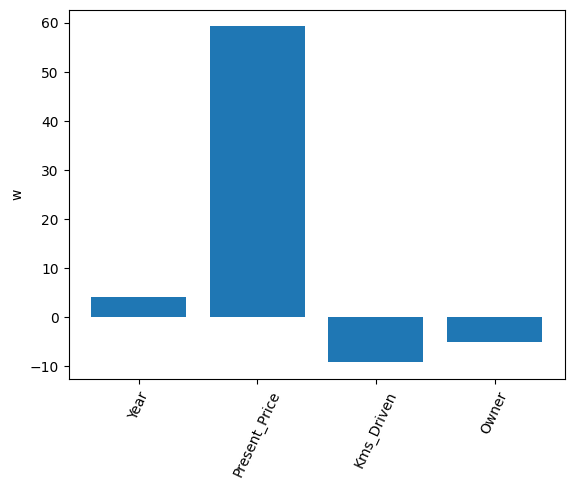

In [9]:
# 4. Проанализируйте важность признаков без библиотеки yellowbrick.
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


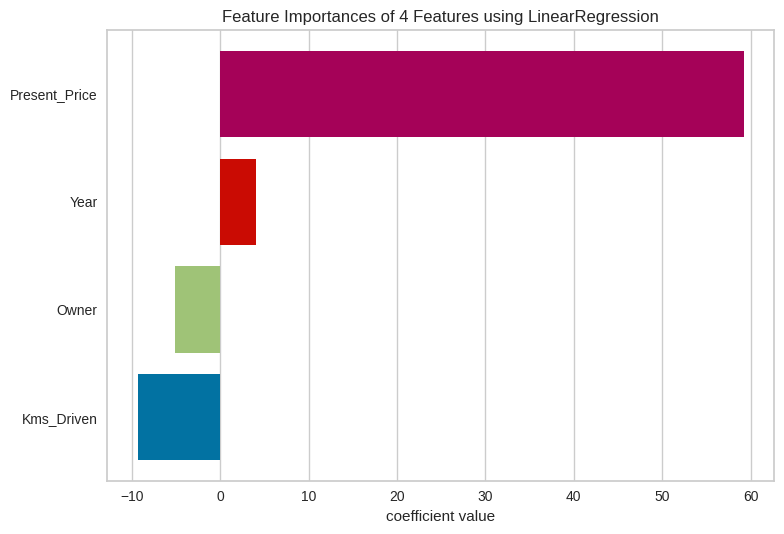

<Axes: title={'center': 'Feature Importances of 4 Features using LinearRegression'}, xlabel='coefficient value'>

In [10]:
# 5. Сравните результат вашего анализа с результатов yellowbrick.
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(reg, relative=False)
viz.fit(X_train, y_train)
viz.show()

In [11]:
# 6. Добавьте категориальные признаки при помощи метода sklearn.preprocessing.OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

# # создаем три датасета train, test и validation
# X = df.drop(columns=['Selling_Price'])
# y = df['Selling_Price']

# # нормализируем
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # отдаем 10% датасета под test set

# print(len(X_train), len(X_test))

# enc = OneHotEncoder(handle_unknown='ignore')

# ohe = enc.fit(df[[c for c in df.columns if df[c].dtype=='object']])


enc = OneHotEncoder()
ohe = enc.fit_transform(df[categ_cols])
df_ohe = pd.DataFrame(ohe.toarray(), columns=enc.get_feature_names_out(), dtype=int)

df_ohe = pd.concat([df,df_ohe],axis=1)
df_ohe.drop(columns=categ_cols, inplace=True)


In [12]:
df_ohe.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [13]:
# 7. Переобучите модель. Также проанализируйте важность признаков, что изменилось? А как изменились метрики?

In [14]:
# # создаем два датасета train и test
X = df_ohe.drop(columns=['Selling_Price'])
y = df_ohe['Selling_Price']

# нормализируем
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # отдаем 10% датасета под test set

print(len(X_train), len(X_test))

240 61


In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
X_test['prediction'] = reg.predict(X_test)

print('MAE:', mean_absolute_error(y_test, X_test['prediction']))
print('MSE:', mean_squared_error(y_test, X_test['prediction']))

# MAE почти не изменилась, MSE уменьшилась в 2 раза

MAE: 1.3820538711120305
MSE: 8.793969803197056


In [17]:
reg.coef_

array([ 7.51771541e+00,  5.05146745e+01, -1.60141126e+01, -1.59206502e-01,
        7.44226668e+00,  1.72513318e+01, -3.01228776e+00,  1.15463195e-14,
       -7.10542736e-15, -1.44337557e+00, -2.25417311e+00,  1.55602162e+00,
        9.58659733e-01,  2.66453526e-14,  8.86514247e-01,  1.24344979e-14,
        8.88178420e-15, -7.55408267e-01,  2.50902228e+00,  3.63404742e-01,
        3.07198816e-01, -1.70364465e+00,  3.13499750e+00, -7.64115294e-02,
       -1.09573425e-02, -2.28049555e-01,  2.61296156e+00,  8.67361738e-15,
        3.67744112e+00, -1.74870703e+00, -1.05386079e+00, -6.06396911e-01,
       -1.41782107e+00,  4.91762923e+00, -1.86618264e+00, -2.87572499e+00,
       -1.98494768e+00,  1.98343617e+00, -3.37996313e-01, -5.22080706e-01,
        9.76440519e-01, -1.35918397e-01, -2.28771815e+00,  3.55271368e-15,
       -1.20078298e+00, -1.18364767e+00, -1.88632876e+00, -9.97120304e-01,
        0.00000000e+00, -1.64475998e+00, -6.95512584e-01,  1.30243052e+00,
       -5.13371324e-01, -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


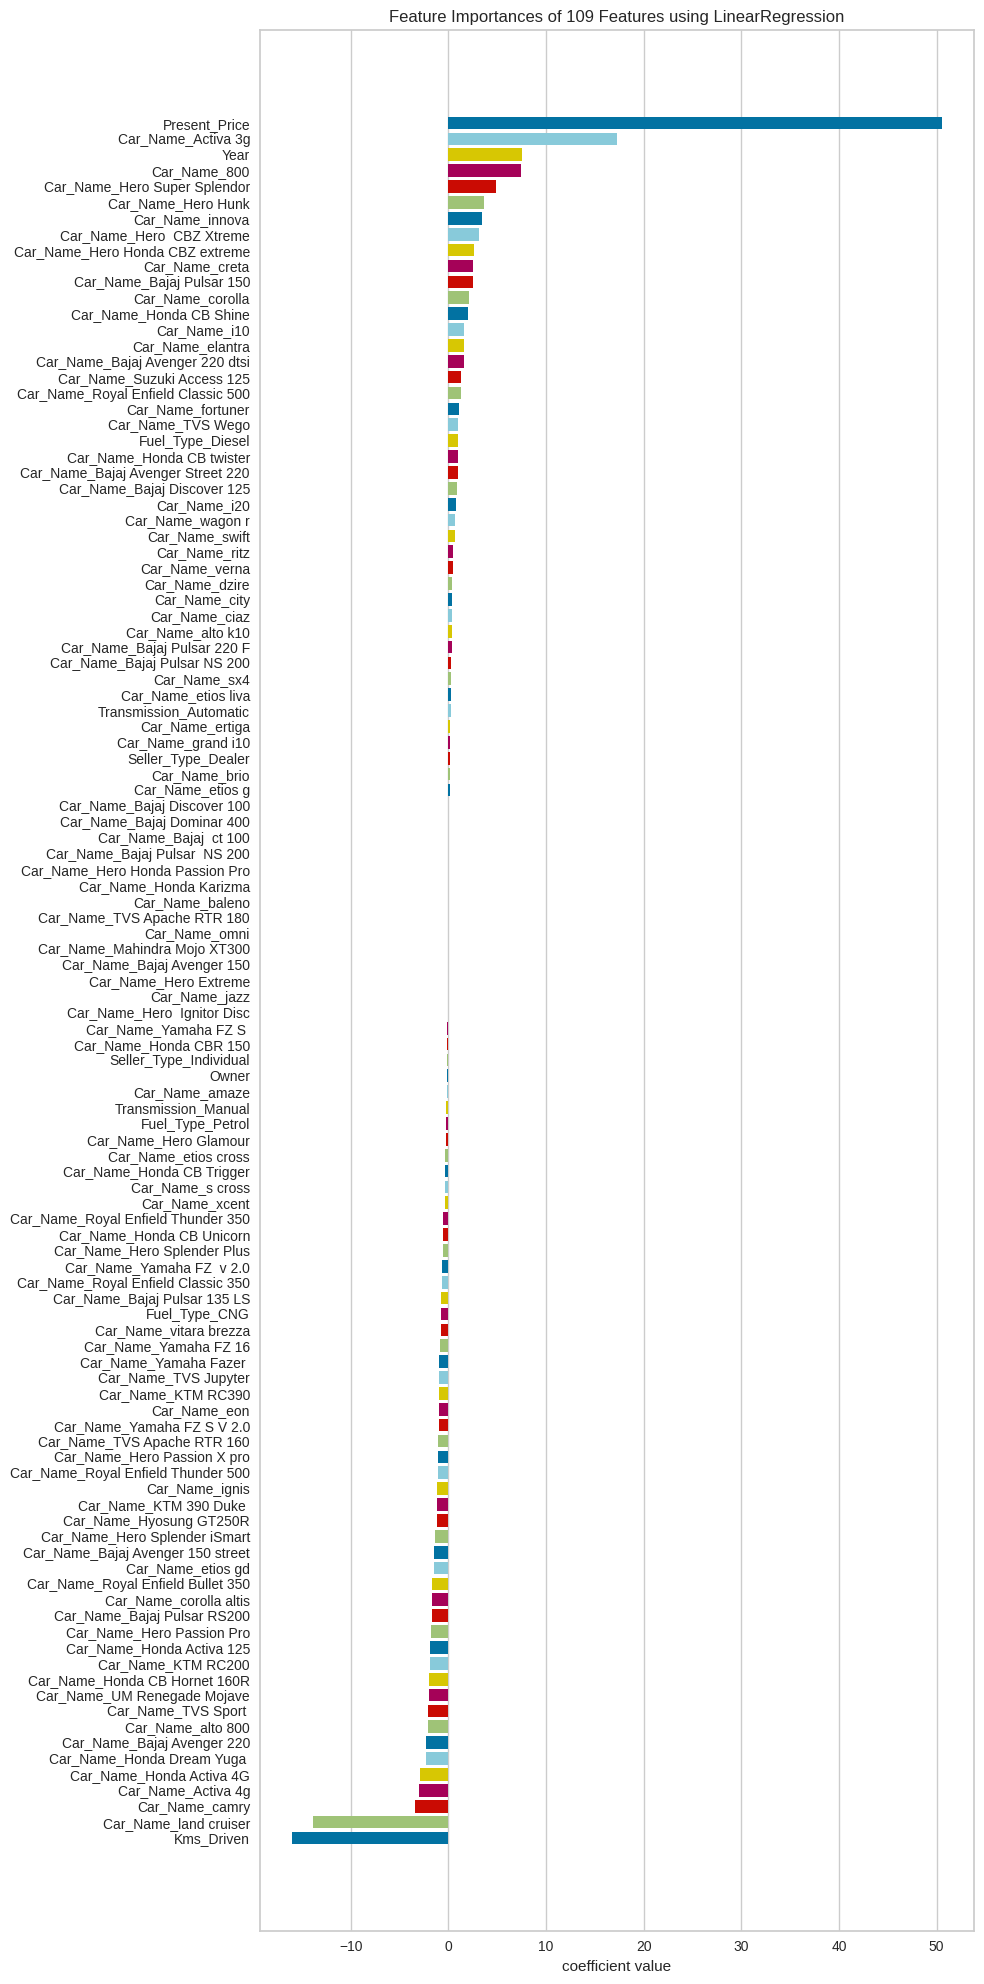

<Axes: title={'center': 'Feature Importances of 109 Features using LinearRegression'}, xlabel='coefficient value'>

In [18]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(reg, relative=False, size=(1000,2000))
viz.fit(X_train, y_train)
viz.show()

In [19]:
# 8. Добавьте регуляризацию (3 типа). Как меняется важность признаков? Как изменяются метрики?
from sklearn.linear_model import ElasticNet

In [20]:
# создаем три датасета: train, test и validation от df_ohe

X = df_ohe.drop(columns=['Selling_Price'])
y = df_ohe['Selling_Price']

# нормализируем
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1) # отдаем 10% датасета под test set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1) # отдаем 10% датасета под validation set

print(len(X_train), len(X_test))

243 31


In [21]:
# ищем лучшие гипермараметры alpha и l1_ratio
best_score = 0
best_model = None
for alpha_ in [0.001, 0.01, 0.1, 1, 10, 100]:
  for l1_ratio_ in [0.001, 0.01, 0.1, 1]:
    reg = ElasticNet(alpha=alpha_, l1_ratio=l1_ratio_)
    reg.fit(X_train, y_train)
    score = reg.score(X_val, y_val)
    if score > best_score:
      best_score = score
      best_parameters = {'alpha': alpha_, 'l1_ratio': l1_ratio_}
      best_model = reg
    print('alpha:', alpha_, 'l1_ratio:', l1_ratio_, 'score:', score)

print('BEST SCORE:', best_score)

alpha: 0.001 l1_ratio: 0.001 score: 0.9031122174594383
alpha: 0.001 l1_ratio: 0.01 score: 0.903277516964137
alpha: 0.001 l1_ratio: 0.1 score: 0.9049095917787326
alpha: 0.001 l1_ratio: 1 score: 0.938205365880135
alpha: 0.01 l1_ratio: 0.001 score: 0.7805992485199609
alpha: 0.01 l1_ratio: 0.01 score: 0.7814303949455556
alpha: 0.01 l1_ratio: 0.1 score: 0.7897803448267134
alpha: 0.01 l1_ratio: 1 score: 0.9273177918768725
alpha: 0.1 l1_ratio: 0.001 score: 0.4975980219510274
alpha: 0.1 l1_ratio: 0.01 score: 0.49721610475126554
alpha: 0.1 l1_ratio: 0.1 score: 0.4937146797899601
alpha: 0.1 l1_ratio: 1 score: 0.6873804445470588
alpha: 1 l1_ratio: 0.001 score: 0.27957563754232995
alpha: 1 l1_ratio: 0.01 score: 0.277047091472713
alpha: 1 l1_ratio: 0.1 score: 0.2589451849948883
alpha: 1 l1_ratio: 1 score: 0.15466534566637058
alpha: 10 l1_ratio: 0.001 score: 0.04463510265707005
alpha: 10 l1_ratio: 0.01 score: 0.039443683954898945
alpha: 10 l1_ratio: 0.1 score: 0.0037518860612558713
alpha: 10 l1_rati

In [22]:
best_score

0.938205365880135

In [23]:
X_test['prediction'] = best_model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, X_test['prediction']))
print('MSE:', mean_squared_error(y_test, X_test['prediction']))

# обе метрики значительно улучшились

MAE: 1.2723693463443166
MSE: 2.8392759452191645


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


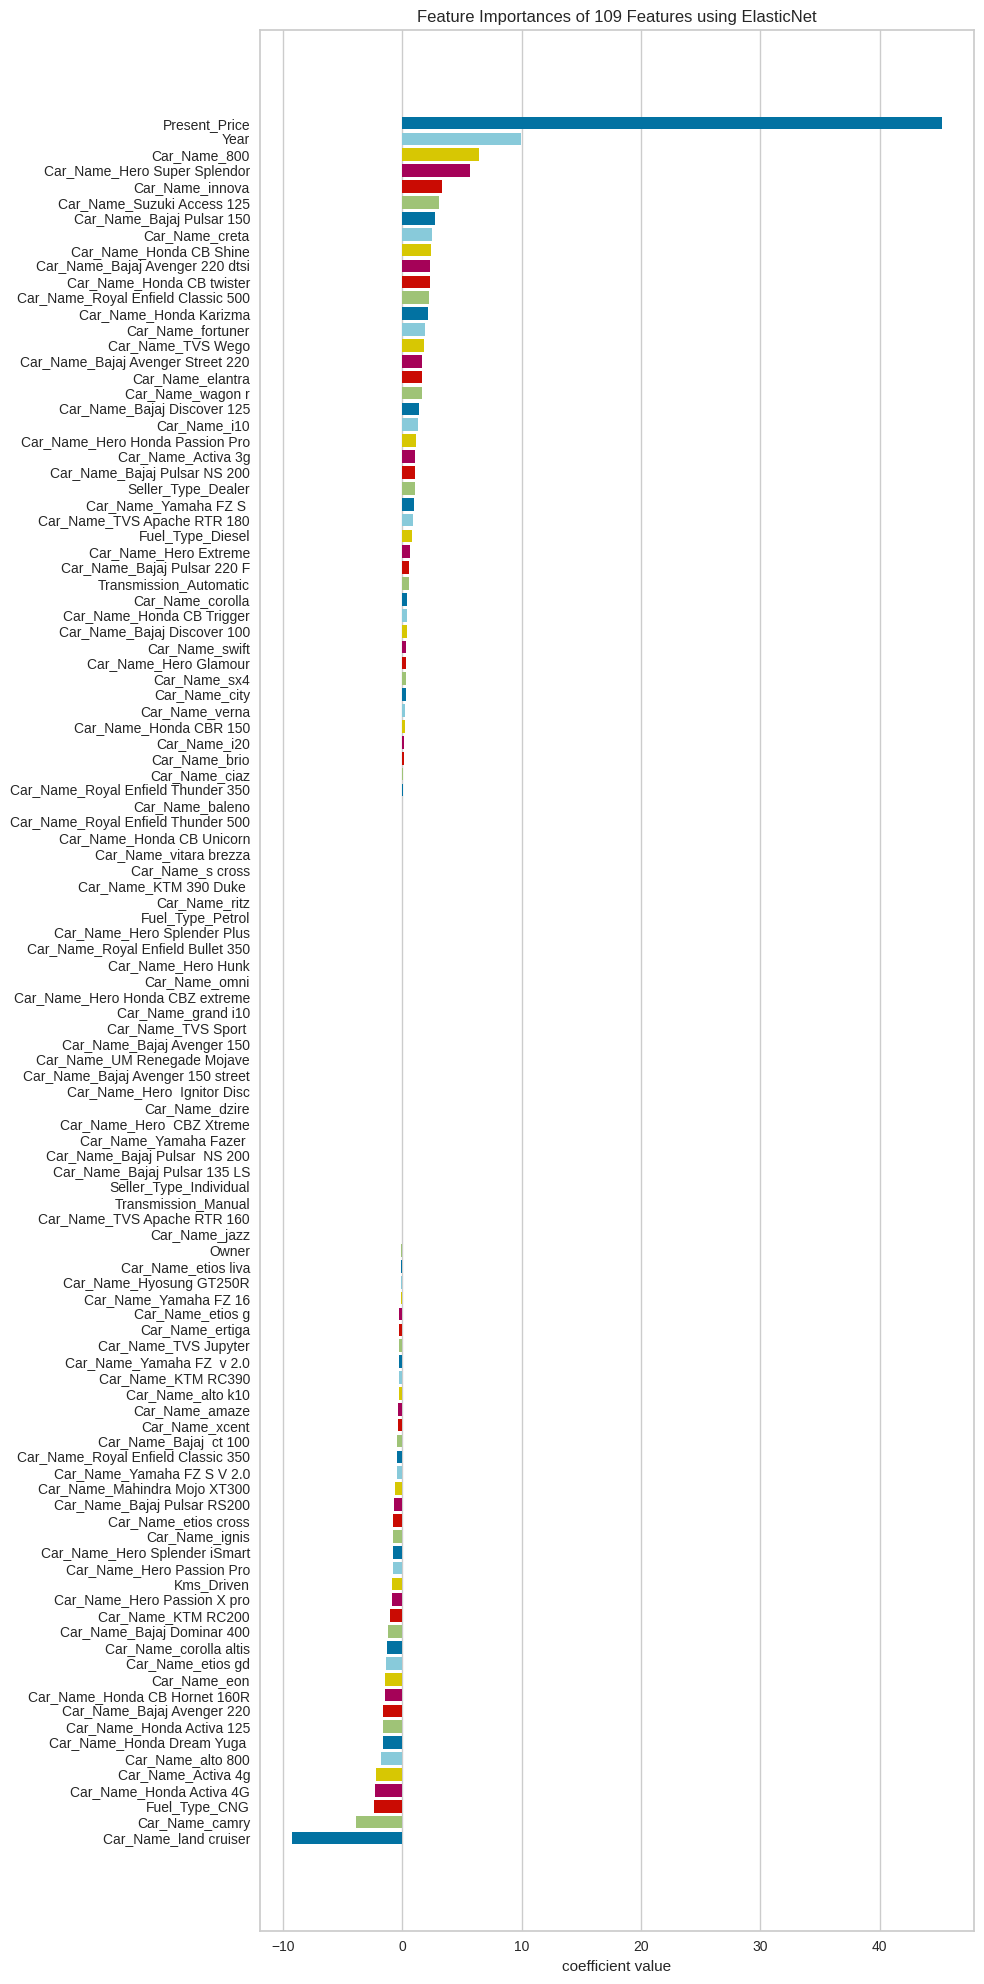

<Axes: title={'center': 'Feature Importances of 109 Features using ElasticNet'}, xlabel='coefficient value'>

In [25]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(best_model, relative=False, size=(1000,2000))
viz.fit(X_train, y_train)
viz.show()

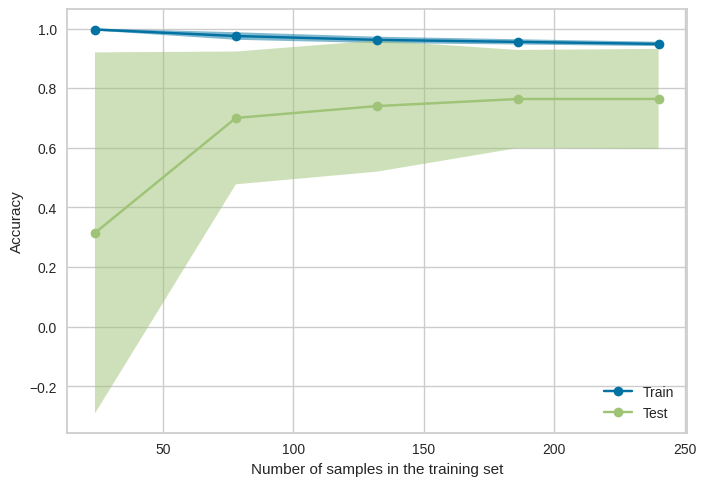

In [29]:
# 9. Добавьте Learning Curve для одной из моделей. Визуализируйте результат!
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(best_model, **common_params,)